### explore data

In [32]:
import os
import numpy as np
import pandas as pd
from nilearn.connectome import ConnectivityMeasure
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
pain_ls = []
relief_ls = []
rest_ls = []
all_ls = []
for f in os.listdir('../data/func'):
    if 'pain' in f:
        pain_ls.append(f)
    elif 'relief' in f:
        relief_ls.append(f)
    else:
        rest_ls.append(f)
    all_ls.append(f)

In [3]:
print(len(all_ls))

33


In [4]:
print(len(pain_ls))

11


In [5]:
print(len(rest_ls))

11


In [6]:
print(len(relief_ls))

11


In [7]:
pain_ls

['s08_pain_func.nii.gz',
 's14_pain_func.nii.gz',
 's01_pain_func.nii.gz',
 's02_pain_func.nii.gz',
 's03_pain_func.nii.gz',
 's10_pain_func.nii.gz',
 's11_pain_func.nii.gz',
 's04_pain_func.nii.gz',
 's07_pain_func.nii.gz',
 's12_pain_func.nii.gz',
 's13_pain_func.nii.gz']

#### look at nifti

In [8]:
func_f = os.path.join('../data/func', pain_ls[0])
print(func_f)

../data/func/s08_pain_func.nii.gz


In [9]:
from nilearn import image

In [10]:
print(image.load_img(func_f).shape)

(91, 109, 91, 230)


In [11]:
# first volume
first_vol = image.index_img(func_f, 0)
print(first_vol.shape)

(91, 109, 91)


In [12]:
from nilearn import plotting

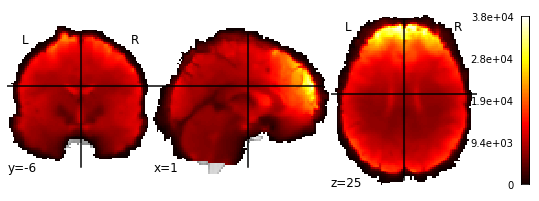

In [13]:
plotting.plot_stat_map(first_vol, threshold=3)

#### extract subjects

done outside of notebook using extract_ts.py. output time series in output/msdl

In [14]:
pain_sess, rest_sess, relief_sess = [], [], []
pooled_sess = []
sess_label = []  # pain/rest/relief
for func_file in all_ls:
    fname = func_file.split('.')[0]
    time_series = np.load(os.path.join('../output/msdl',fname+'.npy'))
    pooled_sess.append(time_series)
    if 'pain' in func_file:
        pain_sess.append(time_series)
    elif 'relief' in func_file:
        relief_sess.append(time_series)
    elif 'rest' in func_file:
        rest_sess.append(time_series)
    sess_label.append(fname.split('_')[1])

In [15]:
len(pain_sess)

11

In [26]:
correlation_measure = ConnectivityMeasure(kind='correlation')

In [20]:
# look at mean correlation across subjects for each condition
mean_cm = []
sess_names = ['pain', 'relief', 'rest']
for s in [pain_sess, relief_sess, rest_sess]:
    correlation_matrices = correlation_measure.fit_transform(s)
    mean_cm.append(correlation_measure.mean_)

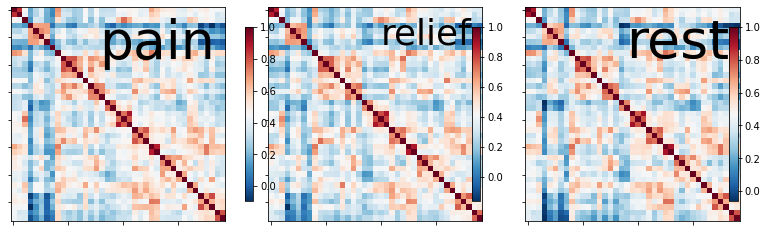

In [22]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
for i, (mat, ax) in enumerate(zip(mean_cm, axes)):
    plotting.plot_matrix(mat, axes=ax, colorbar=True, title=sess_names[i])

/home/fs0/syzhang/.conda/envs/resting/lib/python3.9/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


[[1.         0.85695651 0.46794595]
 [0.85695651 1.         0.4233671 ]
 [0.46794595 0.4233671  1.        ]]
[[1.         0.87667528 0.4101308 ]
 [0.87667528 1.         0.38366007]
 [0.4101308  0.38366007 1.        ]]
[[1.         0.90146067 0.47689266]
 [0.90146067 1.         0.480501  ]
 [0.47689266 0.480501   1.        ]]


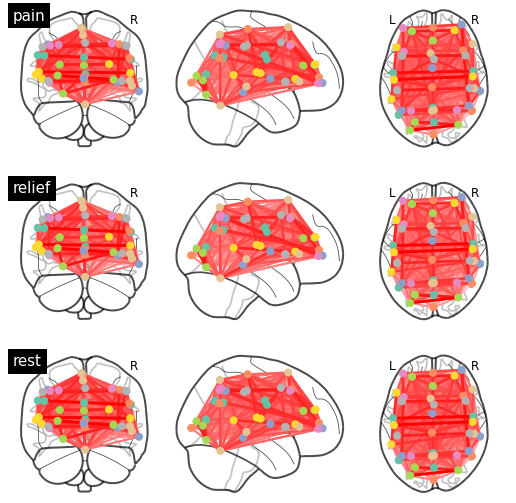

In [24]:
from nilearn import datasets
msdl_data = datasets.fetch_atlas_msdl()
msdl_coords = msdl_data.region_coords
n_regions = len(msdl_coords)

fig, axes = plt.subplots(3,1,figsize=(9,9))
for i, (mat, ax) in enumerate(zip(mean_cm, axes)):
    print(mat[:3,:3])
    plotting.plot_connectome(mat, msdl_coords, axes=ax, title=sess_names[i])

#### look at partial correlation

In [25]:
partial_correlation_measure = ConnectivityMeasure(kind='partial correlation')

In [26]:
# look at mean correlation across subjects for each condition
mean_pcm = []
sess_names = ['pain', 'relief', 'rest']
for s in [pain_sess, relief_sess, rest_sess]:
    partial_correlation_matrices = partial_correlation_measure.fit_transform(s)
    mean_pcm.append(partial_correlation_measure.mean_)

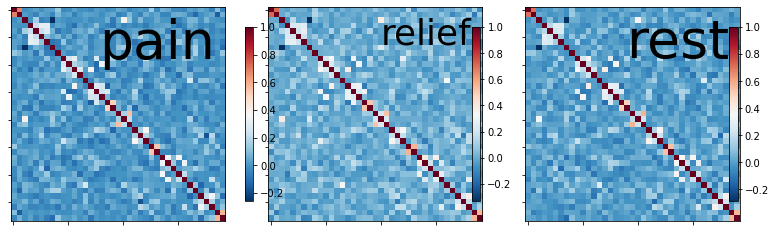

In [27]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
for i, (mat, ax) in enumerate(zip(mean_pcm, axes)):
    plotting.plot_matrix(mat, axes=ax, colorbar=True, title=sess_names[i])

[[ 1.          0.68708226 -0.0140595 ]
 [ 0.68708226  1.          0.02056358]
 [-0.0140595   0.02056358  1.        ]]
[[ 1.          0.71826085 -0.00265101]
 [ 0.71826085  1.         -0.0030452 ]
 [-0.00265101 -0.0030452   1.        ]]
[[ 1.          0.7136715  -0.03176823]
 [ 0.7136715   1.          0.03366131]
 [-0.03176823  0.03366131  1.        ]]


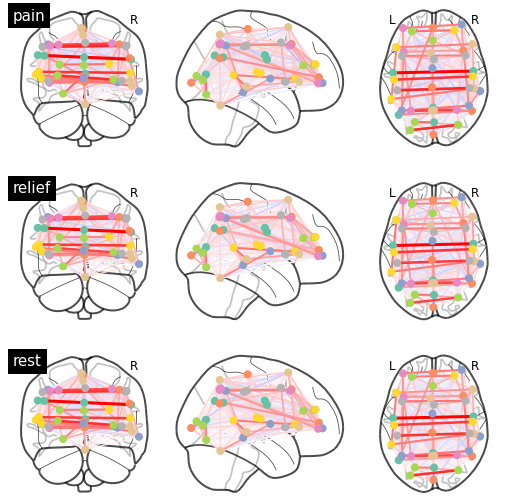

In [28]:
# plot connectome
fig, axes = plt.subplots(3,1,figsize=(9,9))
for i, (mat, ax) in enumerate(zip(mean_pcm, axes)):
    print(mat[:3,:3])
    plotting.plot_connectome(mat, msdl_coords, axes=ax, title=sess_names[i])

#### look at both correlation (tangent space embedding)

In [29]:
tangent_measure = ConnectivityMeasure(kind='tangent')

In [30]:
# look at mean correlation across subjects for each condition
mean_tgm = []
sess_names = ['pain', 'relief', 'rest']
for s in [pain_sess, relief_sess, rest_sess]:
    tangent_matrices = tangent_measure.fit_transform(s)
    mean_tgm.append(tangent_measure.mean_)

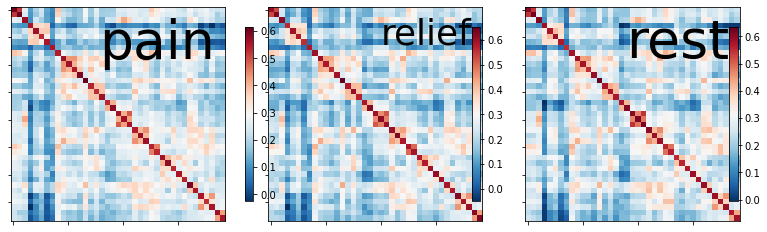

In [31]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
for i, (mat, ax) in enumerate(zip(mean_tgm, axes)):
    plotting.plot_matrix(mat, axes=ax, colorbar=True, title=sess_names[i])

[[0.60728706 0.5228116  0.26452384]
 [0.5228116  0.61067649 0.24740875]
 [0.26452384 0.24740875 0.5712004 ]]
[[0.60635177 0.53176428 0.24614599]
 [0.53176428 0.62787947 0.23275808]
 [0.24614599 0.23275808 0.61822446]]
[[0.6054835  0.54359683 0.27712111]
 [0.54359683 0.62315021 0.2832629 ]
 [0.27712111 0.2832629  0.61147783]]


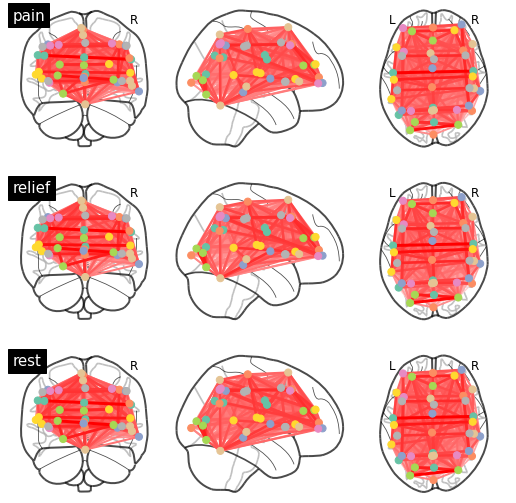

In [32]:
# plot connectome
fig, axes = plt.subplots(3,1,figsize=(9,9))
for i, (mat, ax) in enumerate(zip(mean_tgm, axes)):
    print(mat[:3,:3])
    plotting.plot_connectome(mat, msdl_coords, axes=ax, title=sess_names[i])

#### run classification

In [19]:
kinds = ['correlation', 'partial correlation', 'tangent']
_, classes = np.unique(sess_label, return_inverse=True)
cv = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=5)
pooled_sess = np.asarray(pooled_sess)

In [92]:
print(sess_label)
print(classes)

['relief', 'pain', 'relief', 'relief', 'relief', 'relief', 'rest', 'relief', 'rest', 'rest', 'pain', 'pain', 'relief', 'rest', 'rest', 'pain', 'rest', 'relief', 'rest', 'pain', 'relief', 'pain', 'pain', 'rest', 'rest', 'pain', 'pain', 'rest', 'pain', 'relief', 'rest', 'pain', 'relief']
[1 0 1 1 1 1 2 1 2 2 0 0 1 2 2 0 2 1 2 0 1 0 0 2 2 0 0 2 0 1 2 0 1]


In [81]:
scores = {}
for kind in kinds:
    scores[kind] = []
    for train, test in cv.split(pooled_sess, classes):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.
        connectivity = ConnectivityMeasure(kind=kind, vectorize=True)
        # build vectorized connectomes for subjects in the train set
        connectomes = connectivity.fit_transform(pooled_sess[train])
        # fit the classifier
        classifier = LinearSVC(max_iter=10000).fit(connectomes, classes[train])
        # make predictions for the left-out test subjects
        predictions = classifier.predict(
            connectivity.transform(pooled_sess[test]))
        # store the accuracy for this cross-validation fold
        scores[kind].append(accuracy_score(classes[test], predictions))

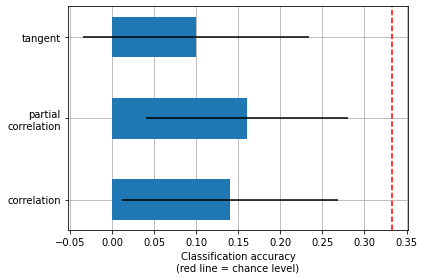

In [83]:
mean_scores = [np.mean(scores[kind]) for kind in kinds]
scores_std = [np.std(scores[kind]) for kind in kinds]

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05, xerr=scores_std)
yticks = [k.replace(' ', '\n') for k in kinds]
plt.yticks(positions, yticks)
plt.gca().grid(True)
plt.gca().set_axisbelow(True)
plt.gca().axvline(1/3, color='red', linestyle='--')
plt.xlabel('Classification accuracy\n(red line = chance level)')
plt.tight_layout()

#### looking at 2 classes (pain vs rest)

In [33]:
# pain_sess, rest_sess, relief_sess
pooled_sess = np.concatenate([np.stack(pain_sess), np.stack(rest_sess)])
classes = np.concatenate([np.ones(len(pain_sess), dtype=int), np.zeros(len(rest_sess), dtype=int)])
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
pooled_sess.shape

(22, 230, 39)

In [42]:
cv = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=2)

In [45]:
scores = {}
for kind in kinds:
    scores[kind] = []
    for train, test in cv.split(pooled_sess, classes):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.
        connectivity = ConnectivityMeasure(kind=kind, vectorize=True)
        # build vectorized connectomes for subjects in the train set
        connectomes = connectivity.fit_transform(pooled_sess[train])
        # fit the classifier
        classifier = LinearSVC(max_iter=10000).fit(connectomes, classes[train])
        # make predictions for the left-out test subjects
        predictions = classifier.predict(connectivity.transform(pooled_sess[test]))
#         predictions = classifier.predict(connectivity.fit_transform(pooled_sess[test]))
        # store the accuracy for this cross-validation fold
        scores[kind].append(accuracy_score(classes[test], predictions))

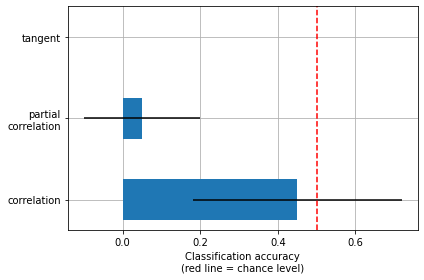

In [44]:
mean_scores = [np.mean(scores[kind]) for kind in kinds]
scores_std = [np.std(scores[kind]) for kind in kinds]

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05, xerr=scores_std)
yticks = [k.replace(' ', '\n') for k in kinds]
plt.yticks(positions, yticks)
plt.gca().grid(True)
plt.gca().set_axisbelow(True)
plt.gca().axvline(1/2, color='red', linestyle='--')
plt.xlabel('Classification accuracy\n(red line = chance level)')
plt.tight_layout()

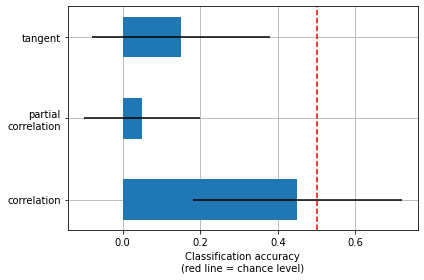

In [46]:
mean_scores = [np.mean(scores[kind]) for kind in kinds]
scores_std = [np.std(scores[kind]) for kind in kinds]

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05, xerr=scores_std)
yticks = [k.replace(' ', '\n') for k in kinds]
plt.yticks(positions, yticks)
plt.gca().grid(True)
plt.gca().set_axisbelow(True)
plt.gca().axvline(1/2, color='red', linestyle='--')
plt.xlabel('Classification accuracy\n(red line = chance level)')
plt.tight_layout()

#### looking at 2 classes (pain vs relief)

In [22]:
# pain_sess, rest_sess, relief_sess
pooled_sess = np.concatenate([np.stack(pain_sess), np.stack(relief_sess)])
classes = np.concatenate([np.ones(len(pain_sess), dtype=int), np.zeros(len(rest_sess), dtype=int)])
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
pooled_sess.shape

(22, 230, 39)

In [24]:
cv = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=3)

In [25]:
scores = {}
for kind in kinds:
    scores[kind] = []
    for train, test in cv.split(pooled_sess, classes):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.
        connectivity = ConnectivityMeasure(kind=kind, vectorize=True)
        # build vectorized connectomes for subjects in the train set
        connectomes = connectivity.fit_transform(pooled_sess[train])
        # fit the classifier
        classifier = LinearSVC(max_iter=10000).fit(connectomes, classes[train])
        # make predictions for the left-out test subjects
        predictions = classifier.predict(
            connectivity.transform(pooled_sess[test]))
        # store the accuracy for this cross-validation fold
        scores[kind].append(accuracy_score(classes[test], predictions))

NameError: name 'ConnectivityMeasure' is not defined

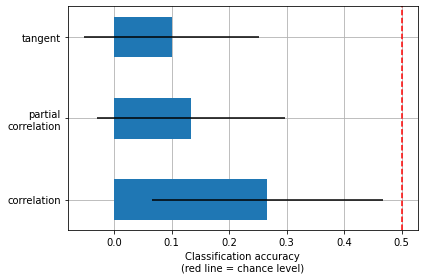

In [115]:
mean_scores = [np.mean(scores[kind]) for kind in kinds]
scores_std = [np.std(scores[kind]) for kind in kinds]

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05, xerr=scores_std)
yticks = [k.replace(' ', '\n') for k in kinds]
plt.yticks(positions, yticks)
plt.gca().grid(True)
plt.gca().set_axisbelow(True)
plt.gca().axvline(1/2, color='red', linestyle='--')
plt.xlabel('Classification accuracy\n(red line = chance level)')
plt.tight_layout()

pain vs relief is worse than pain vs rest

#### looking at 2 classes (rest vs relief)

In [116]:
# pain_sess, rest_sess, relief_sess
pooled_sess = np.concatenate([np.stack(rest_sess), np.stack(relief_sess)])
classes = np.concatenate([np.ones(len(pain_sess), dtype=int), np.zeros(len(rest_sess), dtype=int)])
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [117]:
pooled_sess.shape

(22, 230, 39)

In [118]:
cv = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=3)

In [119]:
scores = {}
for kind in kinds:
    scores[kind] = []
    for train, test in cv.split(pooled_sess, classes):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.
        connectivity = ConnectivityMeasure(kind=kind, vectorize=True)
        # build vectorized connectomes for subjects in the train set
        connectomes = connectivity.fit_transform(pooled_sess[train])
        # fit the classifier
        classifier = LinearSVC(max_iter=10000).fit(connectomes, classes[train])
        # make predictions for the left-out test subjects
        predictions = classifier.predict(
            connectivity.transform(pooled_sess[test]))
        # store the accuracy for this cross-validation fold
        scores[kind].append(accuracy_score(classes[test], predictions))

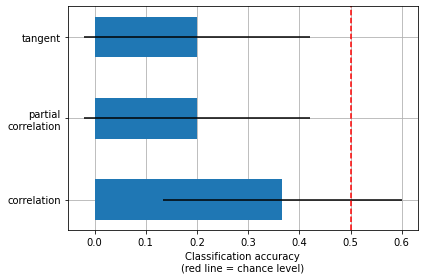

In [120]:
mean_scores = [np.mean(scores[kind]) for kind in kinds]
scores_std = [np.std(scores[kind]) for kind in kinds]

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05, xerr=scores_std)
yticks = [k.replace(' ', '\n') for k in kinds]
plt.yticks(positions, yticks)
plt.gca().grid(True)
plt.gca().set_axisbelow(True)
plt.gca().axvline(1/2, color='red', linestyle='--')
plt.xlabel('Classification accuracy\n(red line = chance level)')
plt.tight_layout()

In [107]:
# none of the simple methods classified above chance

#### using yeo atlas

In [121]:
# download yeo atlas
yeo = datasets.fetch_atlas_yeo_2011()


Dataset created in /home/fs0/syzhang/nilearn_data/yeo_2011



 ...done. (2 seconds, 0 min)
Extracting data from /home/fs0/syzhang/nilearn_data/yeo_2011/d7a5390bfb7686fb41fa64cc2ba058d0/Yeo_JNeurophysiol11_MNI152.zip..... done.


In [131]:
yeo['thick_17']

'/home/fs0/syzhang/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz'

In [157]:
pain_sess, rest_sess, relief_sess = [], [], []
pooled_sess = []
sess_label = []  # pain/rest/relief
for func_file in all_ls:
    fname = func_file.split('.')[0]
#     time_series = np.load(os.path.join('../output/msdl',fname+'.npy'))
    time_series = np.load(os.path.join('../output/yeo',fname+'.npy'))
    pooled_sess.append(time_series)
    if 'pain' in func_file:
        pain_sess.append(time_series)
    elif 'relief' in func_file:
        relief_sess.append(time_series)
    elif 'rest' in func_file:
        rest_sess.append(time_series)
    sess_label.append(fname.split('_')[1])

#### looking at 2 classes (pain vs rest)

In [158]:
# pain_sess, rest_sess, relief_sess
pooled_sess = np.concatenate([np.stack(pain_sess), np.stack(rest_sess)])
classes = np.concatenate([np.ones(len(pain_sess), dtype=int), np.zeros(len(rest_sess), dtype=int)])
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [159]:
pooled_sess.shape

(22, 230, 17)

In [160]:
cv = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=3)

In [161]:
scores = {}
for kind in kinds:
    scores[kind] = []
    for train, test in cv.split(pooled_sess, classes):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.
        connectivity = ConnectivityMeasure(kind=kind, vectorize=True)
        # build vectorized connectomes for subjects in the train set
        connectomes = connectivity.fit_transform(pooled_sess[train])
        # fit the classifier
        classifier = LinearSVC(max_iter=10000).fit(connectomes, classes[train])
        # make predictions for the left-out test subjects
        predictions = classifier.predict(
            connectivity.transform(pooled_sess[test]))
        # store the accuracy for this cross-validation fold
        scores[kind].append(accuracy_score(classes[test], predictions))

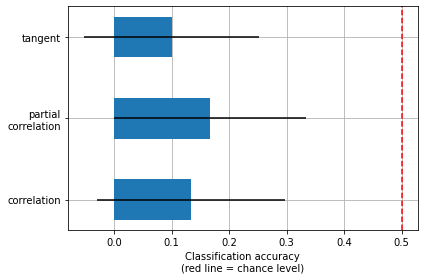

In [162]:
mean_scores = [np.mean(scores[kind]) for kind in kinds]
scores_std = [np.std(scores[kind]) for kind in kinds]

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05, xerr=scores_std)
yticks = [k.replace(' ', '\n') for k in kinds]
plt.yticks(positions, yticks)
plt.gca().grid(True)
plt.gca().set_axisbelow(True)
plt.gca().axvline(1/2, color='red', linestyle='--')
plt.xlabel('Classification accuracy\n(red line = chance level)')
plt.tight_layout()

#### looking at 2 classes (pain vs relief)

In [163]:
# pain_sess, rest_sess, relief_sess
pooled_sess = np.concatenate([np.stack(pain_sess), np.stack(relief_sess)])
classes = np.concatenate([np.ones(len(pain_sess), dtype=int), np.zeros(len(rest_sess), dtype=int)])
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [164]:
pooled_sess.shape

(22, 230, 17)

In [165]:
cv = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=3)

In [166]:
scores = {}
for kind in kinds:
    scores[kind] = []
    for train, test in cv.split(pooled_sess, classes):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.
        connectivity = ConnectivityMeasure(kind=kind, vectorize=True)
        # build vectorized connectomes for subjects in the train set
        connectomes = connectivity.fit_transform(pooled_sess[train])
        # fit the classifier
        classifier = LinearSVC(max_iter=10000).fit(connectomes, classes[train])
        # make predictions for the left-out test subjects
        predictions = classifier.predict(
            connectivity.transform(pooled_sess[test]))
        # store the accuracy for this cross-validation fold
        scores[kind].append(accuracy_score(classes[test], predictions))

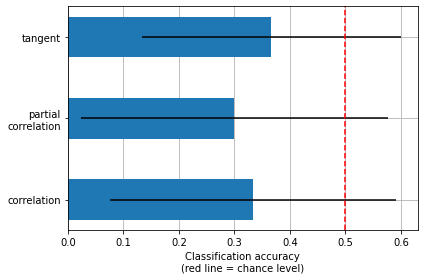

In [167]:
mean_scores = [np.mean(scores[kind]) for kind in kinds]
scores_std = [np.std(scores[kind]) for kind in kinds]

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05, xerr=scores_std)
yticks = [k.replace(' ', '\n') for k in kinds]
plt.yticks(positions, yticks)
plt.gca().grid(True)
plt.gca().set_axisbelow(True)
plt.gca().axvline(1/2, color='red', linestyle='--')
plt.xlabel('Classification accuracy\n(red line = chance level)')
plt.tight_layout()

#### looking at 2 classes (rest vs relief)

In [168]:
# pain_sess, rest_sess, relief_sess
pooled_sess = np.concatenate([np.stack(rest_sess), np.stack(relief_sess)])
classes = np.concatenate([np.ones(len(pain_sess), dtype=int), np.zeros(len(rest_sess), dtype=int)])
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [169]:
pooled_sess.shape

(22, 230, 17)

In [170]:
cv = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=3)

In [171]:
scores = {}
for kind in kinds:
    scores[kind] = []
    for train, test in cv.split(pooled_sess, classes):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.
        connectivity = ConnectivityMeasure(kind=kind, vectorize=True)
        # build vectorized connectomes for subjects in the train set
        connectomes = connectivity.fit_transform(pooled_sess[train])
        # fit the classifier
        classifier = LinearSVC(max_iter=10000).fit(connectomes, classes[train])
        # make predictions for the left-out test subjects
        predictions = classifier.predict(
            connectivity.transform(pooled_sess[test]))
        # store the accuracy for this cross-validation fold
        scores[kind].append(accuracy_score(classes[test], predictions))

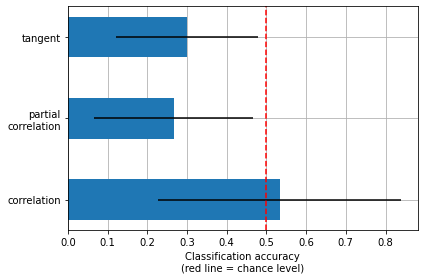

In [172]:
mean_scores = [np.mean(scores[kind]) for kind in kinds]
scores_std = [np.std(scores[kind]) for kind in kinds]

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05, xerr=scores_std)
yticks = [k.replace(' ', '\n') for k in kinds]
plt.yticks(positions, yticks)
plt.gca().grid(True)
plt.gca().set_axisbelow(True)
plt.gca().axvline(1/2, color='red', linestyle='--')
plt.xlabel('Classification accuracy\n(red line = chance level)')
plt.tight_layout()

functional atlas is much better at telling rest/relief apart than anatomical, vice versa for rest/pain

#### using fan 279 atlas

In [141]:
pain_sess, rest_sess, relief_sess = [], [], []
pooled_sess = []
sess_label = []  # pain/rest/relief
for func_file in all_ls:
    fname = func_file.split('.')[0]
#     time_series = np.load(os.path.join('../output/msdl',fname+'.npy'))
    time_series = np.load(os.path.join('../output/fan',fname+'.npy'))
    pooled_sess.append(time_series)
    if 'pain' in func_file:
        pain_sess.append(time_series)
    elif 'relief' in func_file:
        relief_sess.append(time_series)
    elif 'rest' in func_file:
        rest_sess.append(time_series)
    sess_label.append(fname.split('_')[1])

#### looking at 2 classes (pain vs rest)

In [142]:
# pain_sess, rest_sess, relief_sess
pooled_sess = np.concatenate([np.stack(pain_sess), np.stack(rest_sess)])
classes = np.concatenate([np.ones(len(pain_sess), dtype=int), np.zeros(len(rest_sess), dtype=int)])
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [143]:
pooled_sess.shape

(22, 230, 279)

In [144]:
cv = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=3)

In [145]:
scores = {}
for kind in kinds:
    scores[kind] = []
    for train, test in cv.split(pooled_sess, classes):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.
        connectivity = ConnectivityMeasure(kind=kind, vectorize=True)
        # build vectorized connectomes for subjects in the train set
        connectomes = connectivity.fit_transform(pooled_sess[train])
        # fit the classifier
        classifier = LinearSVC(max_iter=10000).fit(connectomes, classes[train])
        # make predictions for the left-out test subjects
        predictions = classifier.predict(
            connectivity.transform(pooled_sess[test]))
        # store the accuracy for this cross-validation fold
        scores[kind].append(accuracy_score(classes[test], predictions))

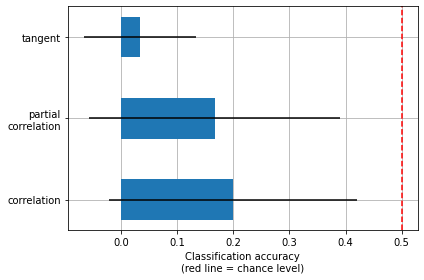

In [146]:
mean_scores = [np.mean(scores[kind]) for kind in kinds]
scores_std = [np.std(scores[kind]) for kind in kinds]

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05, xerr=scores_std)
yticks = [k.replace(' ', '\n') for k in kinds]
plt.yticks(positions, yticks)
plt.gca().grid(True)
plt.gca().set_axisbelow(True)
plt.gca().axvline(1/2, color='red', linestyle='--')
plt.xlabel('Classification accuracy\n(red line = chance level)')
plt.tight_layout()

#### looking at 2 classes (pain vs relief)

In [147]:
# pain_sess, rest_sess, relief_sess
pooled_sess = np.concatenate([np.stack(pain_sess), np.stack(relief_sess)])
classes = np.concatenate([np.ones(len(pain_sess), dtype=int), np.zeros(len(rest_sess), dtype=int)])
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [148]:
pooled_sess.shape

(22, 230, 279)

In [149]:
cv = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=3)

In [150]:
scores = {}
for kind in kinds:
    scores[kind] = []
    for train, test in cv.split(pooled_sess, classes):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.
        connectivity = ConnectivityMeasure(kind=kind, vectorize=True)
        # build vectorized connectomes for subjects in the train set
        connectomes = connectivity.fit_transform(pooled_sess[train])
        # fit the classifier
        classifier = LinearSVC(max_iter=10000).fit(connectomes, classes[train])
        # make predictions for the left-out test subjects
        predictions = classifier.predict(
            connectivity.transform(pooled_sess[test]))
        # store the accuracy for this cross-validation fold
        scores[kind].append(accuracy_score(classes[test], predictions))

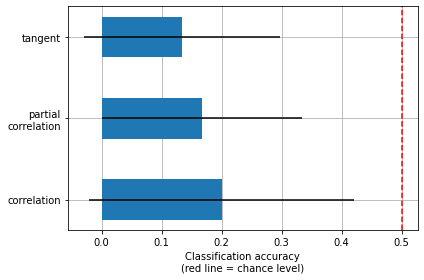

In [151]:
mean_scores = [np.mean(scores[kind]) for kind in kinds]
scores_std = [np.std(scores[kind]) for kind in kinds]

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05, xerr=scores_std)
yticks = [k.replace(' ', '\n') for k in kinds]
plt.yticks(positions, yticks)
plt.gca().grid(True)
plt.gca().set_axisbelow(True)
plt.gca().axvline(1/2, color='red', linestyle='--')
plt.xlabel('Classification accuracy\n(red line = chance level)')
plt.tight_layout()

pain vs relief is worse than pain vs rest

#### looking at 2 classes (rest vs relief)

In [152]:
# pain_sess, rest_sess, relief_sess
pooled_sess = np.concatenate([np.stack(rest_sess), np.stack(relief_sess)])
classes = np.concatenate([np.ones(len(pain_sess), dtype=int), np.zeros(len(rest_sess), dtype=int)])
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [153]:
pooled_sess.shape

(22, 230, 279)

In [154]:
cv = StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=3)

In [155]:
scores = {}
for kind in kinds:
    scores[kind] = []
    for train, test in cv.split(pooled_sess, classes):
        # *ConnectivityMeasure* can output the estimated subjects coefficients
        # as a 1D arrays through the parameter *vectorize*.
        connectivity = ConnectivityMeasure(kind=kind, vectorize=True)
        # build vectorized connectomes for subjects in the train set
        connectomes = connectivity.fit_transform(pooled_sess[train])
        # fit the classifier
        classifier = LinearSVC(max_iter=10000).fit(connectomes, classes[train])
        # make predictions for the left-out test subjects
        predictions = classifier.predict(
            connectivity.transform(pooled_sess[test]))
        # store the accuracy for this cross-validation fold
        scores[kind].append(accuracy_score(classes[test], predictions))

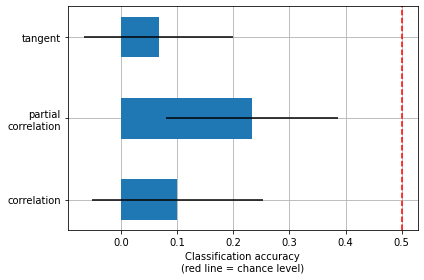

In [156]:
mean_scores = [np.mean(scores[kind]) for kind in kinds]
scores_std = [np.std(scores[kind]) for kind in kinds]

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05, xerr=scores_std)
yticks = [k.replace(' ', '\n') for k in kinds]
plt.yticks(positions, yticks)
plt.gca().grid(True)
plt.gca().set_axisbelow(True)
plt.gca().axvline(1/2, color='red', linestyle='--')
plt.xlabel('Classification accuracy\n(red line = chance level)')
plt.tight_layout()